In [77]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 
import math
import os
import glob
import operator
import tensorflow as tf
from __future__ import division



%matplotlib inline  

In [78]:
# load the images

filelist = glob.glob('C:/Users/ahmad/Desktop/Human-Re-id/Dataset/*.bmp')
dataset = np.array([np.array(cv2.imread(fname)) for fname in filelist])


In [79]:
print("The shape of each image = ", dataset[1].shape)
print("The total number of images =", len(dataset))

The shape of each image =  (128, 48, 3)
The total number of images = 1263


In [80]:
# Initialize the parameters 
def initialize_parameters():

    tf.set_random_seed(1)                              # so that your "random" numbers match ours
        
    W1 = tf.get_variable("W1" , [4,4,3,8], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable("W2", [2,2,8,16], initializer = tf.contrib.layers.xavier_initializer(seed = 0))

    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [81]:
# Create a placeholder 

def create_placeholders(n_H0, n_W0, n_C0):
    """
    Arguments:
    n_H0 -- scalar, height of an input image
    n_W0 -- scalar, width of an input image
    n_C0 -- scalar, number of channels of the input
    n_y -- scalar, number of classes
    """    
    X = tf.placeholder(tf.float32 , [1 ,n_H0, n_W0, n_C0])
    
    #Y = tf.placeholder(tf.float32, [None, n_y])

    
    return X

In [82]:
# Initialize the parameters 

def initialize_parameters():
    
    tf.set_random_seed(1)                                  
    W1 = tf.get_variable("W1" , [4,4,3,8], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    W2 = tf.get_variable("W2", [2,2,8,16], initializer = tf.contrib.layers.xavier_initializer(seed = 0))
    parameters = {"W1": W1,
                  "W2": W2}
    
    return parameters

In [83]:
def forward_propagation(X, parameters):
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # CONV2D: stride of 1, padding 'SAME'
    Z1 = tf.nn.conv2d(X, W1 , strides=[1,1,1,1] , padding='SAME')
    # RELU
    A1 = tf.nn.relu(Z1)
    # MAXPOOL: window 8x8, sride 8, padding 'SAME' tf.nn.max_pool(A, ksize = [1,f,f,1], strides = [1,s,s,1], padding = 'SAME')
    P1 = tf.nn.max_pool(A1, ksize=[1,8,8,1], strides=[1,8,8,1], padding='SAME')
    # CONV2D: filters W2, stride 1, padding 'SAME'
    Z2 = tf.nn.conv2d(P1, W2 , strides=[1,1,1,1], padding='SAME')
    # RELU
    A2 = tf.nn.relu(Z2)
    # MAXPOOL: window 4x4, stride 4, padding 'SAME'
    P2 = tf.nn.max_pool(A2, ksize=[1,4,4,1], strides= [1,4,4,1], padding= 'SAME')
    # FLATTEN
    P2 = tf.contrib.layers.flatten(P2)
   
    # FULLY-CONNECTED without non-linear activation function (not not call softmax).
    # 6 neurons in output layer. Hint: one of the arguments should be "activation_fn=None" tf.contrib.layers.fully_connected(F, num_outputs)
    #Z3 = tf.contrib.layers.fully_connected(P2, 6, activation_fn=None)

    return P2

In [85]:
tf.reset_default_graph()

with tf.Session() as sess:
    
    np.random.seed(1)
    X = create_placeholders(dataset.shape[1], dataset.shape[2], dataset.shape[3])
    features = []
    parameters = initialize_parameters()
    P2 = forward_propagation(X, parameters)
    init = tf.global_variables_initializer()
    sess.run(init)
    for i in range(len(dataset)):
        input_im = np.expand_dims(dataset[i], axis=0)
        a = sess.run(P2, {X: input_im})
        features.append(a)
        
    
    features = np.array(features)

In [86]:
def euclideanDistance(example1, examples2):
    distance = np.linalg.norm(example1 - examples2)
    return distance

In [87]:
def getNeighbors(ImagesSet, reqImage , k):
    distances = []
    
    for x in range(len(ImagesSet)):
        dist = euclideanDistance(reqImage, ImagesSet[x])
        distances.append((ImagesSet[x], dist , x))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x])
    neighbors = np.array(neighbors)
    return neighbors 

In [89]:
testimage  = dataset[0]
imagesets  = dataset[1:]

testimagef = features[0]
imagesetsf  = features[1:] 


neighbors  = getNeighbors(imagesetsf, testimagef, 3)


The index of the matched image in the input images  = 715


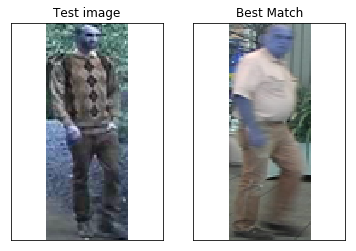

The index of the matched image in the input images  = 807


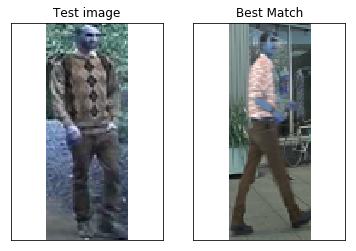

The index of the matched image in the input images  = 747


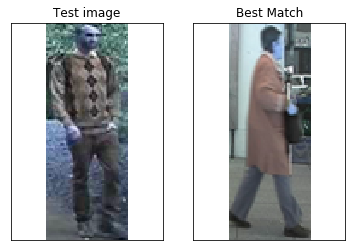

In [90]:
for x in range(len(neighbors)):
    print ("The index of the matched image in the input images  = " + str(neighbors[x, 2]))
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    
    ax1.set_title('Test image')
    ax2.set_title('Best Match')
    
    ax1.xaxis.set_visible(False)
    ax2.xaxis.set_visible(False)
    ax1.yaxis.set_visible(False)
    ax2.yaxis.set_visible(False)
    
    ax1.imshow(testimage)
    ax2.imshow(imagesets[neighbors[x, 2]])
    plt.show()